In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from datetime import date,datetime,timedelta
from dateutil.parser import parse

import json

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 문제 해결
rc('font', family='AppleGothic')

# 차트 축 <- 음수 부호 지원
plt.rcParams['axes.unicode_minus'] = False

In [54]:
# 폰트 확인하는법 
import matplotlib.font_manager as fonm

font_list = [font.name for font in fonm.fontManager.ttflist]

for f in font_list:

    print(f"{f}.ttf")

DejaVu Serif.ttf
DejaVu Serif Display.ttf
STIXGeneral.ttf
DejaVu Sans.ttf
cmsy10.ttf
cmr10.ttf
STIXGeneral.ttf
STIXSizeTwoSym.ttf
STIXNonUnicode.ttf
DejaVu Serif.ttf
STIXNonUnicode.ttf
STIXSizeThreeSym.ttf
STIXSizeOneSym.ttf
STIXSizeFourSym.ttf
cmtt10.ttf
STIXSizeTwoSym.ttf
DejaVu Sans.ttf
STIXNonUnicode.ttf
STIXSizeFourSym.ttf
DejaVu Sans Mono.ttf
STIXNonUnicode.ttf
cmmi10.ttf
STIXSizeFiveSym.ttf
STIXSizeThreeSym.ttf
cmss10.ttf
DejaVu Sans Mono.ttf
DejaVu Sans Mono.ttf
DejaVu Serif.ttf
STIXGeneral.ttf
DejaVu Sans.ttf
DejaVu Sans.ttf
cmex10.ttf
STIXGeneral.ttf
cmb10.ttf
DejaVu Sans Mono.ttf
DejaVu Serif.ttf
DejaVu Sans Display.ttf
STIXSizeOneSym.ttf
Athelas.ttf
Noto Sans PhagsPa.ttf
Tahoma.ttf
Apple SD Gothic Neo.ttf
Noto Sans Old North Arabian.ttf
Noto Sans Buginese.ttf
.SF Compact.ttf
Noteworthy.ttf
Kohinoor Devanagari.ttf
Hiragino Sans.ttf
Noto Sans Marchen.ttf
Georgia.ttf
Apple Braille.ttf
Gurmukhi MN.ttf
Noto Sans Thaana.ttf
Noto Sans Lydian.ttf
Times New Roman.ttf
Hiragino Sans.t

#### dataset load

In [3]:
iris_dataset = sns.load_dataset('iris')
titanic_dataset = sns.load_dataset('titanic')
tips_dataset = sns.load_dataset('tips')
flights_dataset = sns.load_dataset('flights')

In [4]:
titanic_dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [82]:
flights_dataset.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### barplot

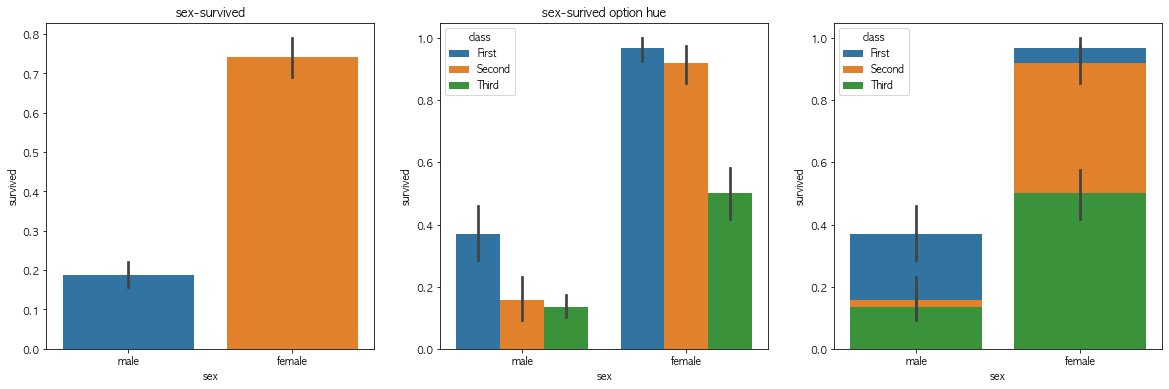

In [39]:
# 성별에 따른 생존률

fig = plt.figure(figsize=(20,6))

area01 = fig.add_subplot(1,3,1)
area01.set_title('sex-survived')
sns.barplot(ax=area01,
            data=titanic_dataset,
            x = 'sex', y = 'survived')

area02 = fig.add_subplot(1,3,2)
area02.set_title('sex-surived option hue')
sns.barplot(ax=area02,
            data=titanic_dataset,
            x = 'sex', y = 'survived',hue='class')

area03 = fig.add_subplot(1,3,3)
sns.barplot(ax=area03,
            data=titanic_dataset,
            x = 'sex', y = 'survived',hue='class',dodge=False)

plt.show()
plt.close()

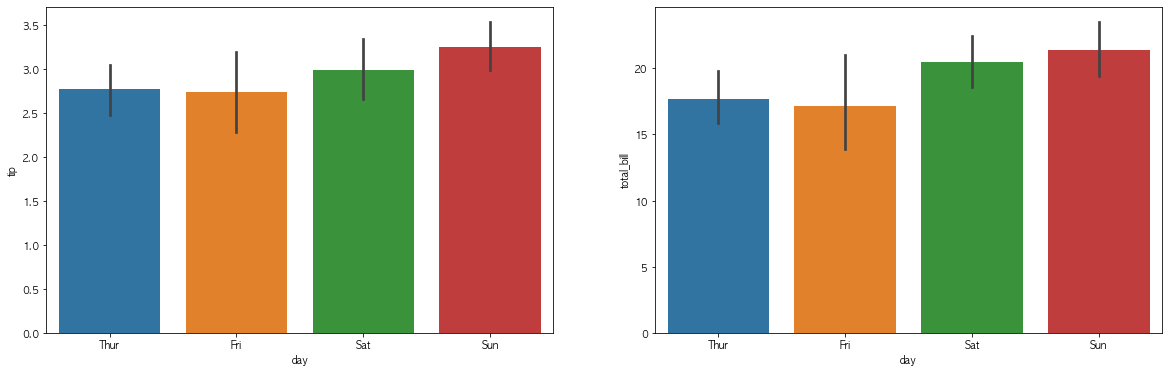

In [25]:
# 요일별 팁
fig = plt.figure(figsize=(20,6))
area01 = fig.add_subplot(1,2,1)
sns.barplot(ax=area01,
            data=tips_dataset,
            x = 'day', y = 'tip')

area02 = fig.add_subplot(1,2,2)
sns.barplot(ax=area02,
            data=tips_dataset,
            x = 'day', y = 'total_bill')

plt.show()

### countplot
- 빈도를 표시하기 때문에 당연히 x하나만 들어간다

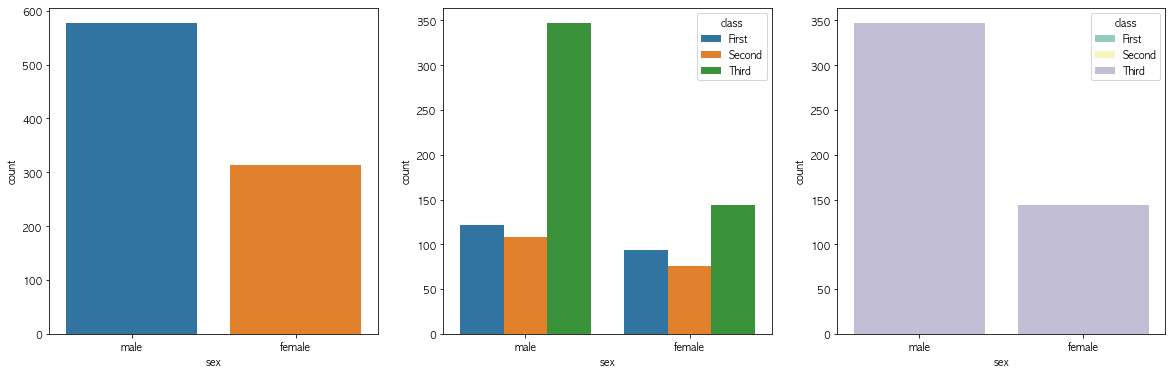

In [62]:
fig = plt.figure(figsize=(20,6))

area01 = fig.add_subplot(1,3,1)
sns.countplot(ax=area01,
            data=titanic_dataset,
            x = 'sex')


area02 = fig.add_subplot(1,3,2)
sns.countplot(ax=area02,
            data=titanic_dataset,
            x = 'sex',hue='class')

area03 = fig.add_subplot(1,3,3)
sns.countplot(ax=area03,
            data=titanic_dataset,
            x = 'sex',hue='class',palette='Set3',dodge=False
             )


plt.show()
plt.close()

<AxesSubplot:xlabel='class', ylabel='count'>

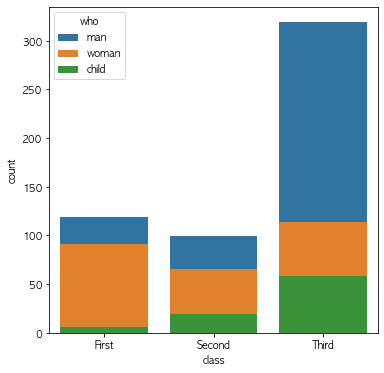

In [46]:
# 이건 왜 dodge가되는거지
fig = plt.figure(figsize=(20,6))

area01 = fig.add_subplot(1,3,1)
sns.countplot(ax=area01,
            data=titanic_dataset,
            x = 'class',hue='who',dodge=False)

### stritplot()
- 모든 데이터를 점으로 시각화

<AxesSubplot:xlabel='day', ylabel='total_bill'>

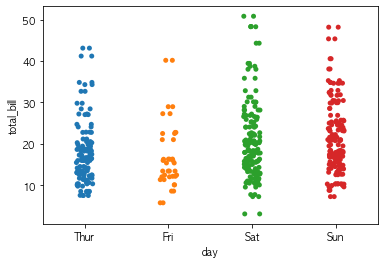

In [52]:
# 요일별 토탈 빌 분포
sns.stripplot(data=tips_dataset,x='day',y='total_bill')
sns.stripplot(data=tips_dataset,x='day',y='total_bill',jitter=True)

### swarmplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

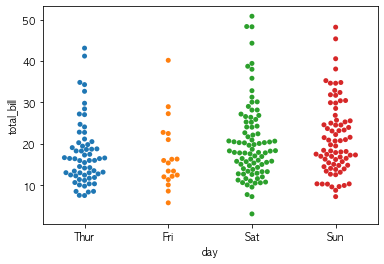

In [57]:
# 요일별 토탈 빌 분포
sns.swarmplot(data=tips_dataset,x='day',y='total_bill')

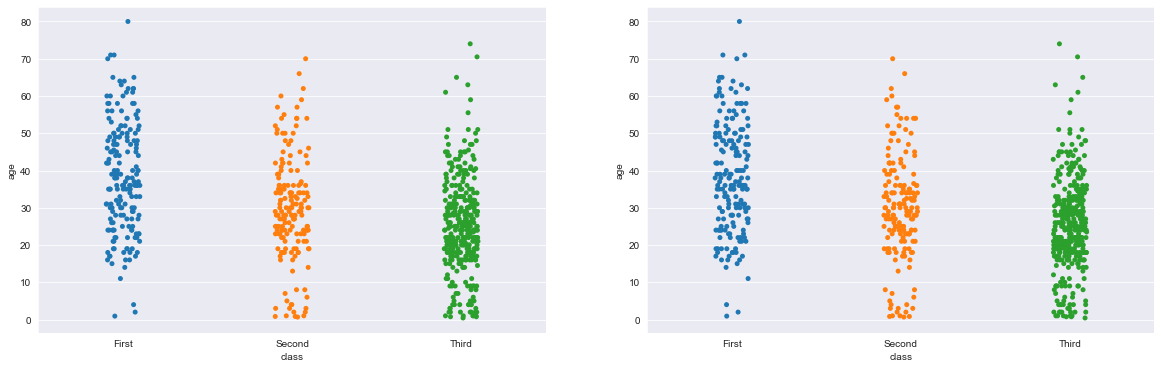

In [67]:
# 타이타닉 이용해서
# 서브플롯 2개 영역
# 클래스별 나이 분포
fig = plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

area01 = fig.add_subplot(1,2,1)
sns.stripplot(ax=area01,x='class',y='age',data=titanic_dataset,jitter=True)

area02 = fig.add_subplot(1,2,2)
sns.stripplot(ax=area02,x='class',y='age',data=titanic_dataset)

plt.show()
plt.close()

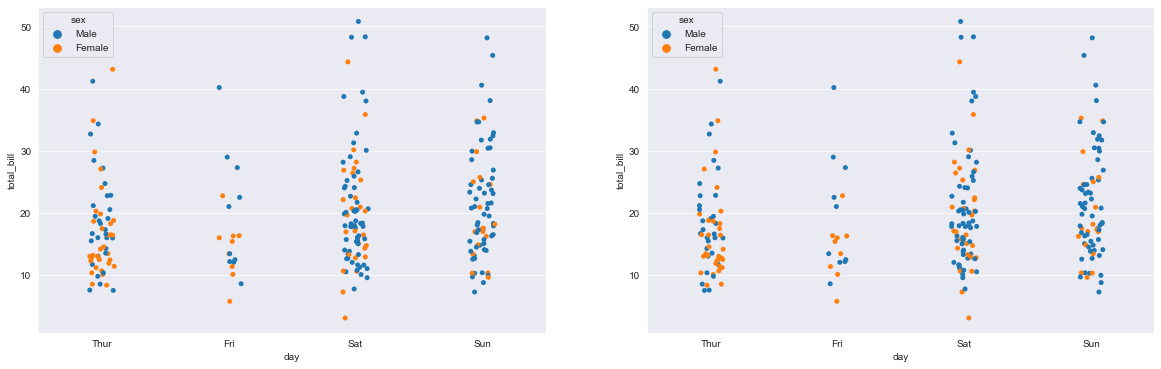

In [68]:
# 요일과 성별에 따른 전체팁의 분포를 확인하는 시각화
fig = plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

area01 = fig.add_subplot(1,2,1)
sns.stripplot(ax=area01,x='day',hue='sex',y='total_bill',data=tips_dataset,jitter=True)

area02 = fig.add_subplot(1,2,2)
sns.stripplot(ax=area02,x='day',hue='sex',y='total_bill',data=tips_dataset)

plt.show()
plt.close()

### boxplot
### violinplot

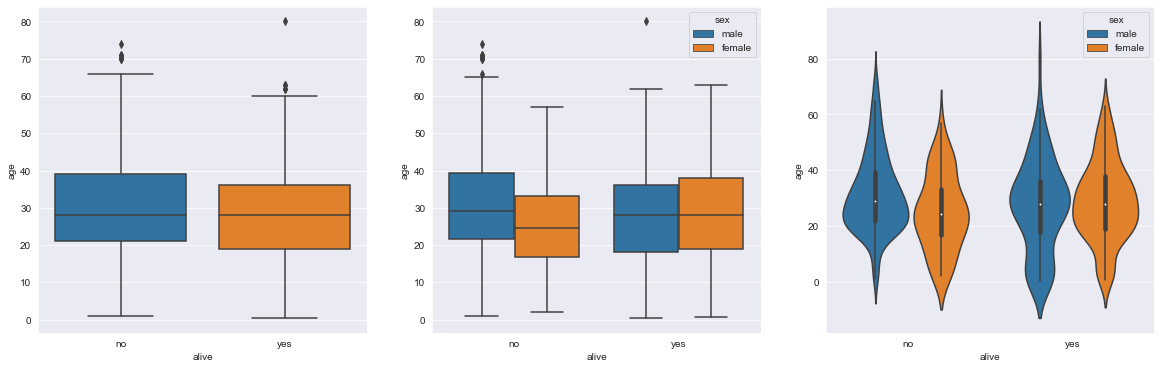

In [71]:
fig = plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

area01 = fig.add_subplot(1,3,1)
sns.boxplot(ax=area01,x='alive',y='age',data=titanic_dataset)


area02 = fig.add_subplot(1,3,2)
sns.boxplot(ax=area02,x='alive',hue='sex',y='age',data=titanic_dataset)

area03 = fig.add_subplot(1,3,3)
sns.violinplot(ax=area03,x='alive',hue='sex',y='age',data=titanic_dataset)

plt.show()
plt.close()

### heatmap

In [74]:
table = titanic_dataset.pivot_table(index='sex',columns='class',aggfunc='size')
display(table)

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:xlabel='class', ylabel='sex'>

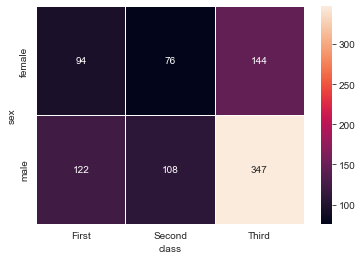

In [80]:
sns.heatmap(data=table,
            annot=True,fmt='d', # 'd'는 정수
            linewidths=1,
            cbar=True)  # default:True => False주면 컬러바 사라진다 

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


<AxesSubplot:xlabel='month', ylabel='year'>

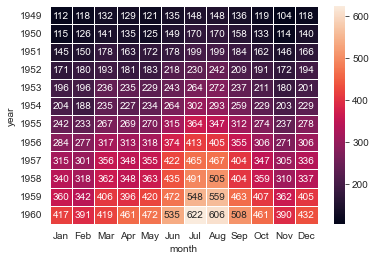

In [89]:
#### 년도에 월별 승객수에 대한 히트맵 시각화
table = flights_dataset.pivot_table(values='passengers',index='year',columns='month',aggfunc='sum')
display(table)
sns.heatmap(data=table,
            annot=True,fmt='d',
            linewidths=1)

### pairplot()

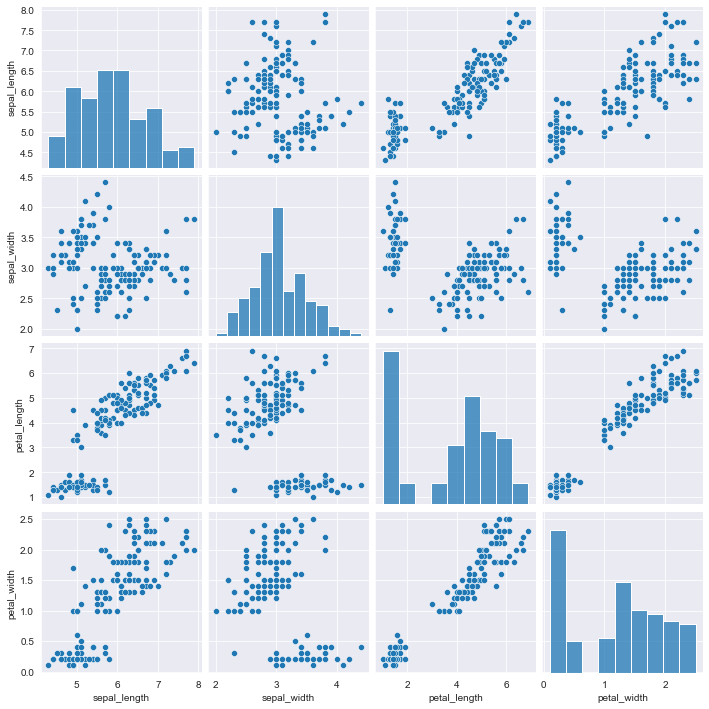

In [90]:
# 자동적으로 numeric 한 데이터에 대해서만 구해준다
sns.pairplot(iris_dataset)

### folium

In [1]:
import folium as g

In [16]:
seoul_map = g.Map(location=[37.53,126.97],
            zoom_start=10,
            tiles='Stamen Terrain')
seoul_map

#### 서울지역 대학교 위치

In [19]:
uni_location = pd.read_excel('/Users/iganghui/TIL/Python/Python_data_science/Data/서울지역 대학교 위치.xlsx',index_col=0)
uni_location.head()

,위도,경도
KAIST 서울캠퍼스,37.592573,127.046737
KC대학교,37.548345,126.854797
가톨릭대학교(성신교정),37.585922,127.004328
가톨릭대학교(성의교정),37.499623,127.006065
감리교신학대학교,37.567645,126.961610


In [24]:
for name,lat,lng in zip(uni_location.index,uni_location.위도,uni_location.경도):
    g.Marker([lat,lng],popup=name,icon=g.Icon(color='red')).add_to(seoul_map)

seoul_map

In [28]:
for name,lat,lng in zip(uni_location.index,uni_location.위도,uni_location.경도):
    g.CircleMarker([lat,lng],popup=name,icon=g.Icon(color='blue'),fill=True,fill_color='blue',alpha=0.8).add_to(seoul_map)

seoul_map

In [75]:
school_df = pd.read_excel('/Users/iganghui/TIL/Python/Python_data_science/Data/elem_school_folium.xlsx')
school_df.head()

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자,제공기관코드,제공기관명
0,B000001838,서울휘경초등학교,초등학교,1959-10-10,공립,본교,운영,서울특별시 동대문구 휘경동 302-2,서울특별시 동대문구 망우로6길 48,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.585736,127.058122,2019-09-16,7001220,한국교원대학교
1,B000001839,서울동답초등학교,초등학교,1984-05-23,공립,본교,운영,서울특별시 동대문구 답십리동 2-24,서울특별시 동대문구 답십리로60길 12,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.571817,127.064205,2019-09-16,7001220,한국교원대학교
2,B000001840,서울답십리초등학교,초등학교,1962-11-29,공립,본교,운영,서울특별시 동대문구 답십리동 274,서울특별시 동대문구 전농로3길 23,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.569003,127.055423,2019-09-16,7001220,한국교원대학교
3,B000001841,서울신답초등학교,초등학교,1972-05-09,공립,본교,운영,서울특별시 동대문구 답십리동 463-13,서울특별시 동대문구 천호대로 177,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.573001,127.043399,2019-09-16,7001220,한국교원대학교
4,B000001842,서울용두초등학교,초등학교,1948-11-01,공립,본교,운영,서울특별시 동대문구 용두동 237-1,서울특별시 동대문구 천호대로13길 43,7010000,서울특별시교육청,7021000,서울특별시동부교육지원청,2013-11-29,2019-09-10,37.575743,127.028885,2019-09-16,7001220,한국교원대학교


In [76]:
# Feature selection
# 학급명 학교급그분 소재지도로명주소 위도 경도

school_df = school_df.filter(['학교명','학교급구분','소재지도로명주소','위도','경도'])

In [77]:
school_df.isna().any()

학교명         False
학교급구분       False
소재지도로명주소     True
위도          False
경도          False
dtype: bool

In [78]:
school_df.dropna(axis=0,inplace=True)
school_df.isna().any()

학교명         False
학교급구분       False
소재지도로명주소    False
위도          False
경도          False
dtype: bool

In [82]:
# 도로명 주소에 서울이 포함되고 학교급구분이 초등학교

# school_df.query('학교급구분=="초등학교" and 소재지도로명주소.str.contains("서울특별시")')
mask = (school_df['소재지도로명주소'].str.contains('서울'))&(school_df['학교급구분']=='초등학교')
school_df_filter = school_df[mask]

#school_df_filter = school_df.loc[school_df.query('학교급구분=="초등학교"')['소재지도로명주소'].str.contains("서울").index]
display(school_df_filter)

,학교명,학교급구분,소재지도로명주소,위도,경도
0,서울휘경초등학교,초등학교,서울특별시 동대문구 망우로6길 48,37.585736,127.058122
1,서울동답초등학교,초등학교,서울특별시 동대문구 답십리로60길 12,37.571817,127.064205
2,서울답십리초등학교,초등학교,서울특별시 동대문구 전농로3길 23,37.569003,127.055423
3,서울신답초등학교,초등학교,서울특별시 동대문구 천호대로 177,37.573001,127.043399
4,서울용두초등학교,초등학교,서울특별시 동대문구 천호대로13길 43,37.575743,127.028885
...,...,...,...,...,...
11684,서울위례별초등학교,초등학교,서울특별시 송파구 위례광장로 243,37.479086,127.145042
11702,서울하늘숲초등학교,초등학교,서울특별시 구로구 오리로 1106,37.484688,126.842417
11731,서울언남초등학교,초등학교,서울특별시 서초구 헌릉로8길 42,37.453919,127.061343
11772,서울항동초등학교,초등학교,서울특별시 구로구 연동로 178,37.476731,126.823983


In [83]:
school_map = g.Map(location=[37.53,126.97],
            zoom_start=10,
            tiles='Stamen Terrain')

for idx in school_df_filter.index:
    g.Marker([ school_df_filter.loc[idx,'위도'], school_df_filter.loc[idx,'경도'] ]).add_to(school_map)
    
school_map

### Choropleth

In [114]:
pop_df = pd.read_excel('/Users/iganghui/TIL/Python/Python_data_science/Data/경기도인구데이터.xlsx',index_col=0)
pop_df.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932


In [91]:
geom_json = json.load(open('/Users/iganghui/TIL/Python/Python_data_science/Data/경기도행정구역경계.json'))
geom_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': 31380,
    'name': '양평군',
    'name_eng': 'Yangpyeong-gun',
    'base_year': 2013},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.56113535909492, 37.6256560539258],
      [127.57290963929243, 37.61087369350498],
      [127.56366973908277, 37.5842624297699],
      [127.52226606559191, 37.5828628697518],
      [127.50048767007603, 37.569036373178626],
      [127.47687473909174, 37.574448241913856],
      [127.47565866803647, 37.60512112601634],
      [127.44699730711024, 37.64497584741164],
      [127.4272349102434, 37.66284420898682],
      [127.40156700708162, 37.64806970784708],
      [127.3732642199939, 37.6453987554284],
      [127.3542931884407, 37.6250006376975],
      [127.34360057873045, 37.588997440929354],
      [127.31002843450217, 37.53523876142835],
      [127.30923294884336, 37.5135706079458],
      [127.32809611134748, 37.53133849534739],
      [127.3663244453597, 37.5

In [115]:
pop_df.columns = pop_df.columns.map(str)
pop_df.columns

Index(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'],
      dtype='object')

In [116]:
pop_map = g.Map(location=[37.509671, 127.055517],
            zoom_start=10)

#구분된 경계선
g.Choropleth(geo_data = geom_json,
             data     = pop_df['2017'],
             columns  = [pop_df.index,pop_df['2017']],
             key_on   ='feature.properties.name').add_to(pop_map)

pop_map